In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os

In [3]:
# Load Dataset

image_path = './Dataset/'

images = []

for filename in os.listdir(image_path):
    img = tf.keras.preprocessing.image.load_img(f"{image_path}{filename}", target_size=(102, 136))
    img = tf.keras.preprocessing.image.img_to_array(img)
    images.append(img)

In [4]:
# Preprocess Images

images = np.asarray(images).astype(np.float32)/255.0

x_train = images[:-10]
x_test = images[-10:]

In [5]:
# Iterasi training process
MAX_EPOCHS = 500

# Satu iterasi berapa training sample sebelum diperbarui parameternya
BATCH_SIZE = 250

# Hyperparameter untuk mengontrol step size disetiap iterasi
# kadang kita pakai adam buat adaptive learning rate
LEARNING_RATE = 0.0001

# Banyaknya hidden layer
HIDDEN_DIM = 512

# Mendapatkan layer dengan tinggi, lebar, dan dimensi warnanya
ORIGINAL_DIM = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]

print(x_train.shape, ORIGINAL_DIM)

(4990, 102, 136, 3) 41616


In [6]:
# reshape kalo -1 buat jadi flatten, x_train.shape[0] itu buat 

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Untuk mengubah x train dalam bentuk tensorflow agar bisa diproses dibbrp batch
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(BATCH_SIZE)

In [7]:
# Vanilla AE Class

# encoder
class Encoder(keras.layers.Layer):
    def __init__(self, hidden_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = keras.layers.Dense(units = hidden_dim, activation=tf.nn.relu)
        self.batch_norm = keras.layers.BatchNormalization()

    def call(self, input_features):
        input_features = self.batch_norm(input_features)
        return self.hidden_layer(input_features)

class Decoder(keras.layers.Layer):
    def __init__(self, original_dim):
        super(Decoder, self).__init__()
        self.output_layer = keras.layers.Dense(units = original_dim, activation=tf.nn.relu)
        self.batch_norm = keras.layers.BatchNormalization()

    def call(self, encoded):
        reconstructed = self.output_layer(encoded)
        reconstructed = self.batch_norm(reconstructed)
        return reconstructed

class AutoEncoder(keras.Model):
    def __init__(self, hidden_dim, original_dim):
        super(AutoEncoder, self).__init__()
        self.encoder = Encoder(hidden_dim=hidden_dim)
        self.decoder = Decoder(original_dim=original_dim)
        self.loss = []
    def call(self, input_features):
        encoded = self.encoder(input_features)
        reconstructed = self.decoder(encoded)
        return reconstructed

In [8]:
# Defining functions for training

def loss(preds, real):
    return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

def train(model, opt, original):
    with tf.GradientTape() as tape:
        preds = model(original)
        reconstruction_error = loss(preds, original)
    
    gradients = tape.gradient(reconstruction_error, model.trainable_variables)
    gradient_variables = zip(gradients, model.trainable_variables)
    opt.apply_gradients(gradient_variables)

    return reconstruction_error

def train_loop(model, opt, dataset, epochs):
    for epoch in range(epochs):
        loss_list = []

        for batch_features in dataset:
            recon_lost = train(model, opt, batch_features)
            loss_list.append(recon_lost)
        
        model.loss.append(np.mean(loss_list))
        print(f"Epoch [{epoch+1}/{MAX_EPOCHS}, Loss [{np.mean(loss_list):.2f}]]")

In [17]:
autoencoder = AutoEncoder(HIDDEN_DIM, ORIGINAL_DIM)

optimizer = tf.optimizers.Adam(LEARNING_RATE)
train_loop(autoencoder, optimizer, training_dataset, MAX_EPOCHS)

Epoch [1/500, Loss [0.32]]
Epoch [2/500, Loss [0.22]]
Epoch [3/500, Loss [0.21]]
Epoch [4/500, Loss [0.20]]
Epoch [5/500, Loss [0.18]]
Epoch [6/500, Loss [0.17]]
Epoch [7/500, Loss [0.16]]
Epoch [8/500, Loss [0.15]]
Epoch [9/500, Loss [0.15]]
Epoch [10/500, Loss [0.14]]
Epoch [11/500, Loss [0.14]]
Epoch [12/500, Loss [0.14]]
Epoch [13/500, Loss [0.13]]
Epoch [14/500, Loss [0.13]]
Epoch [15/500, Loss [0.13]]
Epoch [16/500, Loss [0.12]]
Epoch [17/500, Loss [0.12]]
Epoch [18/500, Loss [0.12]]
Epoch [19/500, Loss [0.12]]
Epoch [20/500, Loss [0.11]]
Epoch [21/500, Loss [0.11]]
Epoch [22/500, Loss [0.11]]
Epoch [23/500, Loss [0.11]]
Epoch [24/500, Loss [0.10]]
Epoch [25/500, Loss [0.10]]
Epoch [26/500, Loss [0.10]]
Epoch [27/500, Loss [0.10]]
Epoch [28/500, Loss [0.10]]
Epoch [29/500, Loss [0.10]]
Epoch [30/500, Loss [0.10]]
Epoch [31/500, Loss [0.09]]
Epoch [32/500, Loss [0.09]]
Epoch [33/500, Loss [0.09]]
Epoch [34/500, Loss [0.09]]
Epoch [35/500, Loss [0.09]]
Epoch [36/500, Loss [0.09]]
E

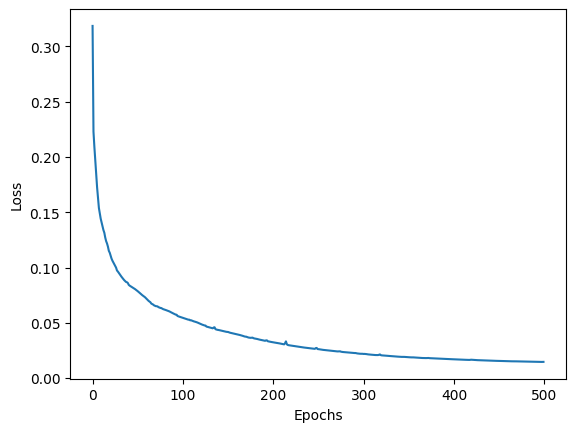

In [18]:
plt.plot(range(MAX_EPOCHS), autoencoder.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

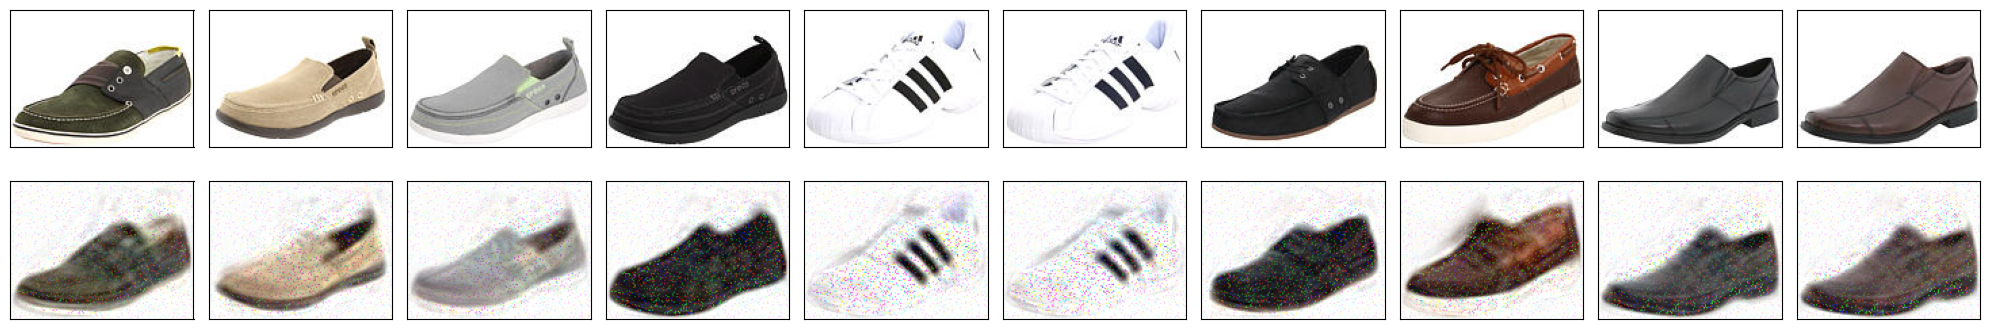

In [20]:
number = 10
plt.figure(figsize=(20, 4))

for index in range(number):
    ax = plt.subplot(2, number, index+1)
    plt.imshow(x_test[index].reshape(102, 136, 3), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

for index in range(number):
    ax = plt.subplot(2, number, number + index + 1)
    reconstructed_image = autoencoder(x_test)[index].numpy().reshape(102, 136, 3)
    plt.imshow(reconstructed_image, cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.tight_layout()
plt.show()